In [1]:
import sys
sys.path.append("..")
from eval.eval_vkitti_gt import EvaluateVKittiGT
import numpy as np

In [2]:
pred_disps = np.load("../data/output/vkitti/midterm/resnet-new-cs-kitti/test/disparities.npy")
pred_disps.shape

(2126, 256, 512)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(pred_disps[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
ev = EvaluateVKittiGT(predicted_disps=pred_disps[:100],
            root_dir="../data/vkitti",
            filenames_file="../resources/filenames/vkitti_test_files.txt")

In [5]:
ev.depth_paths = ev.depth_paths[:100]

In [6]:
result = ev.evaluate()

In [7]:
result.as_csv_line()

'    0.2780,     6.2626,     11.266,      0.406,      0.671,      0.837,      0.904'

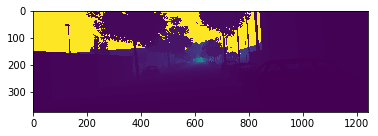

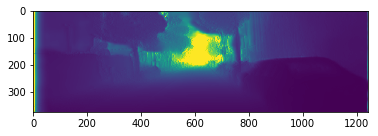

In [8]:
gt_depth = ev.gt_depths[0]
pred_depth = ev.pred_depths[0]
plt.imshow(gt_depth)
plt.show()
plt.imshow(pred_depth)
plt.show()

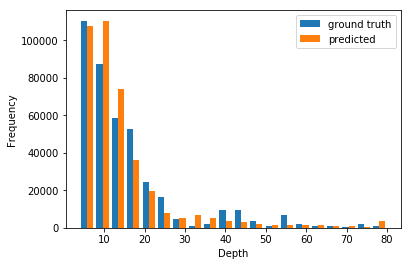

In [11]:
mask = gt_depth <= 80
plt.hist([gt_depth[mask],pred_depth[mask]], bins=20, label=['ground truth', 'predicted'])
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.legend()

In [21]:
ev.gt_depths[0].mean()

25.454074761137957

In [19]:
ev.pred_depths[0].mean()

16.484943

In [13]:
import os
root_dir="../data/vkitti"
filenames_file="../resources/filenames/vkitti_test_files.txt"
# load image paths
with open(filenames_file) as filenames:
    image_paths = sorted(
        os.path.join(root_dir, fname.split()[0]) for fname in filenames
    )

# convert to depth paths
depth_paths = [
    "/".join(
        [
            path if path != "vkitti_1.3.1_rgb" else "vkitti_1.3.1_depthgt"
            for path in str.split(image_path, "/")
        ]
    )
    for image_path in image_paths
]

In [14]:
depth_paths

['../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00000.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00001.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00002.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00003.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00004.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00005.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00006.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00007.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00008.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00009.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00010.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00011.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00012.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00013.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00014.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00015.png',
 '../data/vkitti/vkitti_